#### Imports 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px

%matplotlib inline

### The Project at First Glance

    The goal of this project is to analyze what we know about COVID-19's statistical significance, as well as conduct a forecast analysis to predict the severity of COVID-19 as we approach the Winter season. Could there be another arduous wave of COVID-19 through Winter? If so, how detrimental may it be toward our efforts to flatten the curve?
    
- Dataset - https://raw.githubusercontent.com/CSSEGISandData/COVID-19/ (Johns Hopkins CSSEGIS, Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE))

## Confirmed Cases Data Retrieval

In [59]:
COVID_CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

covid_confirmed = pd.read_csv(COVID_CONFIRMED_URL)

covid_confirmed['Province/State'].fillna('', inplace=True)
covid_confirmed['Country/Region'].fillna('', inplace=True)

covid_confirmed.info() 
covid_confirmed.isna().sum().sum()
covid_confirmed.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 170 entries, Province/State to 7/5/20
dtypes: float64(2), int64(166), object(2)
memory usage: 353.4+ KB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20
0,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,212,259,267,276,284,291,315,328,346,346


## Confirmed Fatalities Data Retrieval

In [58]:
COVID_DEATHS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

covid_deaths = pd.read_csv(COVID_DEATHS_URL)

covid_deaths['Province/State'].fillna('', inplace=True)
covid_deaths['Country/Region'].fillna('', inplace=True)

covid_deaths.info()
covid_deaths.isna().sum().sum()
covid_deaths.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 170 entries, Province/State to 7/5/20
dtypes: float64(2), int64(166), object(2)
memory usage: 353.4+ KB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20
0,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,683,703,721,733,746,774,807,819,826,864
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,51,53,55,58,62,65,69,72,74,76
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,885,892,897,905,912,920,928,937,946,952
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,10,10,11,11,13,15,17,18,19,19


## Confirmed Recoveries Data Retrieval

In [57]:
COVID_RECOVERED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

covid_recovered = pd.read_csv(COVID_RECOVERED_URL)

covid_recovered['Province/State'].fillna('', inplace=True)
covid_recovered['Country/Region'].fillna('', inplace=True)

covid_recovered.info()
covid_recovered.isna().sum().sum()
covid_recovered.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 170 entries, Province/State to 7/5/20
dtypes: float64(2), int64(166), object(2)
memory usage: 336.1+ KB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20
0,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,10306,10674,12604,13934,14131,15651,16041,17331,19164,19366
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1298,1346,1384,1438,1459,1516,1559,1592,1637,1657
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9066,9202,9371,9674,9897,10040,10342,10832,11181,11492
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,799,799,799,799,799,799,800,800,800,800
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,81,81,81,93,93,97,97,107,108,108


## Time Series Data Breakdown

### 1 - Confirmed Cases 

In [114]:
raw_confirmed_cases_ts = covid_confirmed.loc[:, '1/22/20':]
covid_confirmed_count = raw_confirmed_cases_ts.sum().max()
raw_confirmed_cases_ts.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20
0,0,0,0,0,0,0,0,0,0,0,...,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951
1,0,0,0,0,0,0,0,0,0,0,...,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893
2,0,0,0,0,0,0,0,0,0,0,...,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941
3,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,0,0,0,0,0,0,0,0,0,0,...,212,259,267,276,284,291,315,328,346,346


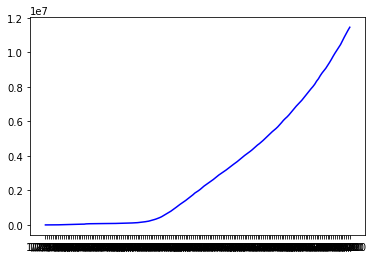

In [115]:
## Time series data analysis for confirmed cases 
confirmed_cases_plot = plt.plot(covid_confirmed_total_count, color='blue')
plt.show(confirmed_cases_plot)

### 2 - Confirmed Deaths

In [69]:
raw_confirmed_deaths_ts = covid_deaths.loc[:, '1/22/20':]
covid_deaths_count = raw_confirmed_deaths_ts.sum().max()
raw_confirmed_deaths_ts.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20
0,0,0,0,0,0,0,0,0,0,0,...,683,703,721,733,746,774,807,819,826,864
1,0,0,0,0,0,0,0,0,0,0,...,51,53,55,58,62,65,69,72,74,76
2,0,0,0,0,0,0,0,0,0,0,...,885,892,897,905,912,920,928,937,946,952
3,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,0,0,0,0,0,0,0,0,0,0,...,10,10,11,11,13,15,17,18,19,19


### 3 - Confirmed Recoveries

In [70]:
raw_confirmed_recoveries_ts = covid_recovered.loc[:, '1/22/20':]
covid_recovered_count = raw_confirmed_recoveries_ts.sum().max()
raw_confirmed_recoveries_ts.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20
0,0,0,0,0,0,0,0,0,0,0,...,10306,10674,12604,13934,14131,15651,16041,17331,19164,19366
1,0,0,0,0,0,0,0,0,0,0,...,1298,1346,1384,1438,1459,1516,1559,1592,1637,1657
2,0,0,0,0,0,0,0,0,0,0,...,9066,9202,9371,9674,9897,10040,10342,10832,11181,11492
3,0,0,0,0,0,0,0,0,0,0,...,799,799,799,799,799,799,800,800,800,800
4,0,0,0,0,0,0,0,0,0,0,...,81,81,81,93,93,97,97,107,108,108


In [71]:
world_df = pd.DataFrame({
    'confirmed': [covid_confirmed_count],
    'deaths': [covid_deaths_count],
    'recovered': [covid_recovered_count],
    'active': [covid_confirmed_count - covid_deaths_count - covid_recovered_count]
})

world_df

,confirmed,deaths,recovered,active
0,11449707,534267,6179006,4736434


In [78]:
world_long_df = world_df.melt(value_vars=['active', 'deaths', 'recovered'],
                              var_name="status",
                              value_name="count")

world_long_df['upper'] = 'confirmed'

world_long_df

,status,count,upper
0,active,4736434,confirmed
1,deaths,534267,confirmed
2,recovered,6179006,confirmed


# Total Active Cases, Deaths, & Recoveries 

<BarContainer object of 3 artists>

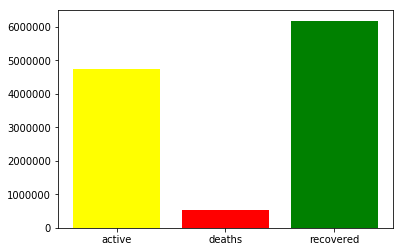

In [92]:
colors = ['yellow', 'red', 'green'] 
plt.bar(x=world_long_df['status'], height=world_long_df['count'], align='center', color=colors)

In [95]:
fig = px.treemap(world_long_df, path=["upper", "status"], values="count",
                 color_discrete_sequence=['#00CC66', '#FFFF00', '#e74c3c'],
                 template='plotly_dark')

fig.show()